In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_10degree = pd.read_csv('x_10degree.csv',header=None)

In [5]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x.shape

(654, 15)

In [8]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [9]:
y_10degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [12]:
y = y_10degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_10degree[:, -2]

In [14]:
theta = x_10degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(588, 100, 100)


In [17]:
print(y_test.shape)

(66, 100, 100)


In [18]:
print(x_train.shape)

(588, 15, 1)


In [19]:
print(x_test.shape)

(66, 15, 1)


In [20]:
theta_train

array([ 720.,  630.,  490.,  760.,  160.,  500.,  410.,  650.,  260.,
        490.,  170.,  740.,  390., 1080.,  540.,   60.,  240.,  920.,
        730.,  610.,   90., 1010.,  270.,  860.,  400.,  530.,  620.,
        120.,   20.,  410., 1010.,  990.,  560.,    0.,  110.,  560.,
         20., 1000.,  230.,  240.,  770.,  840.,  790.,  860.,   10.,
        820.,  110.,  700.,  770.,  890.,  700.,  640.,  250.,  910.,
        260.,  600.,  670.,  390.,  140.,  180.,  780.,  740.,   30.,
        550., 1040., 1030.,  200.,  130.,  290.,  250.,  500.,  950.,
        870.,  480.,  560.,   50.,  380.,  990.,    0.,  670., 1010.,
        680.,  420.,  610.,  940.,  300.,  560., 1040.,   50.,   40.,
        590.,   90.,   70.,  890.,  440.,  730.,  310.,   90.,   10.,
       1010.,  310.,  110.,  430.,  420.,  730.,  580.,  900.,  230.,
        660.,  110.,    0.,  950., 1040., 1030.,  470.,  470.,  680.,
        890.,  660.,  830.,  420., 1020.,  800.,  790.,  230.,  160.,
        170.,  210.,

In [21]:
tsr_train

array([1.6, 1.9, 1.6, 1.9, 1.9, 1.9, 1.7, 1.5, 1.8, 1.5, 1.7, 1.7, 1.5,
       1.7, 1.6, 1.5, 1.6, 1.7, 1.6, 2. , 1.6, 1.7, 1.8, 1.5, 2. , 1.7,
       2. , 1.9, 1.7, 1.5, 1.5, 1.6, 1.5, 1.6, 1.9, 1.7, 1.8, 1.6, 1.6,
       1.5, 2. , 2. , 1.9, 1.7, 1.6, 1.5, 2. , 1.9, 1.5, 1.9, 1.5, 2. ,
       1.8, 1.9, 1.6, 1.5, 2. , 2. , 1.8, 1.5, 2. , 2. , 1.7, 1.8, 1.6,
       1.7, 1.9, 1.8, 1.5, 2. , 1.7, 1.6, 1.7, 2. , 1.6, 1.8, 2. , 1.8,
       1.8, 1.6, 1.8, 2. , 1.7, 1.8, 1.7, 1.7, 2. , 1.5, 1.6, 1.9, 1.9,
       1.7, 1.5, 1.5, 1.9, 2. , 1.9, 1.8, 1.8, 1.6, 1.6, 1.8, 1.5, 1.5,
       1.5, 1.6, 2. , 2. , 1.5, 1.5, 1.7, 1.9, 1.7, 1.9, 1.7, 1.8, 1.6,
       2. , 1.8, 1.5, 2. , 1.7, 1.8, 1.5, 1.5, 1.7, 1.8, 1.9, 1.7, 2. ,
       1.7, 1.8, 1.6, 1.7, 1.7, 2. , 1.9, 1.5, 1.9, 1.8, 1.8, 2. , 1.7,
       1.5, 1.8, 2. , 1.6, 1.6, 1.7, 1.5, 1.9, 1.8, 2. , 1.5, 1.6, 1.9,
       1.6, 1.8, 1.6, 1.5, 2. , 1.5, 1.8, 1.5, 1.9, 1.9, 1.9, 1.6, 1.5,
       1.7, 1.7, 1.7, 1.7, 1.5, 2. , 1.6, 1.9, 1.9, 1.5, 1.7, 1.

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=2000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/2000
15/15 [==============================] - 1s 6ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 2/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1026
Epoch 3/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1004
Epoch 4/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0934
Epoch 5/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0858
Epoch 6/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 7/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0835
Epoch 8/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 9/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0812
Epoch 10/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0790
Epoch 11/2000
15/15 [==================

15/15 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0425
Epoch 86/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 87/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0419
Epoch 88/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0416
Epoch 89/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 90/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 91/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 92/2000
15/15 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0406
Epoch 93/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0404
Epoch 94/2000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 95/2000
15/15 [=======================

15/15 [==============================] - 0s 5ms/step - loss: 8.1588e-04 - rmse: 0.0255
Epoch 169/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.1132e-04 - rmse: 0.0254
Epoch 170/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.0288e-04 - rmse: 0.0252
Epoch 171/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.9555e-04 - rmse: 0.0251
Epoch 172/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.8903e-04 - rmse: 0.0249
Epoch 173/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.8464e-04 - rmse: 0.0248
Epoch 174/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.7631e-04 - rmse: 0.0247
Epoch 175/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.7071e-04 - rmse: 0.0245
Epoch 176/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.6512e-04 - rmse: 0.0244
Epoch 177/2000
15/15 [==============================] - 0s 5ms/step - loss: 7.5467e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 4.7176e-04 - rmse: 0.0174
Epoch 249/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.6969e-04 - rmse: 0.0174
Epoch 250/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.6989e-04 - rmse: 0.0174
Epoch 251/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.6679e-04 - rmse: 0.0173
Epoch 252/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.6558e-04 - rmse: 0.0173
Epoch 253/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.6211e-04 - rmse: 0.0172
Epoch 254/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.5814e-04 - rmse: 0.0171
Epoch 255/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.5587e-04 - rmse: 0.0170
Epoch 256/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.5508e-04 - rmse: 0.0170
Epoch 257/2000
15/15 [==============================] - 0s 6ms/step - loss: 4.5204e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 3.3804e-04 - rmse: 0.0132
Epoch 329/2000
15/15 [==============================] - 0s 6ms/step - loss: 3.3792e-04 - rmse: 0.0132
Epoch 330/2000
15/15 [==============================] - 0s 5ms/step - loss: 3.3513e-04 - rmse: 0.0131
Epoch 331/2000
15/15 [==============================] - 0s 6ms/step - loss: 3.3295e-04 - rmse: 0.0130
Epoch 332/2000
15/15 [==============================] - 0s 5ms/step - loss: 3.3267e-04 - rmse: 0.0130
Epoch 333/2000
15/15 [==============================] - 0s 6ms/step - loss: 3.3129e-04 - rmse: 0.0130
Epoch 334/2000
15/15 [==============================] - 0s 5ms/step - loss: 3.3109e-04 - rmse: 0.0130
Epoch 335/2000
15/15 [==============================] - 0s 5ms/step - loss: 3.3091e-04 - rmse: 0.0130
Epoch 336/2000
15/15 [==============================] - 0s 5ms/step - loss: 3.3001e-04 - rmse: 0.0129
Epoch 337/2000
15/15 [==============================] - 0s 5ms/step - loss: 3.2910e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 2.7088e-04 - rmse: 0.0106
Epoch 409/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.7003e-04 - rmse: 0.0106
Epoch 410/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6944e-04 - rmse: 0.0106
Epoch 411/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6896e-04 - rmse: 0.0106
Epoch 412/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6907e-04 - rmse: 0.0106
Epoch 413/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6852e-04 - rmse: 0.0105
Epoch 414/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6829e-04 - rmse: 0.0105
Epoch 415/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6760e-04 - rmse: 0.0105
Epoch 416/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6697e-04 - rmse: 0.0105
Epoch 417/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.6639e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 2.3384e-04 - rmse: 0.0091
Epoch 489/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3301e-04 - rmse: 0.0091
Epoch 490/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3300e-04 - rmse: 0.0091
Epoch 491/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3205e-04 - rmse: 0.0090
Epoch 492/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3181e-04 - rmse: 0.0090
Epoch 493/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3111e-04 - rmse: 0.0090
Epoch 494/2000
15/15 [==============================] - 0s 6ms/step - loss: 2.3085e-04 - rmse: 0.0090
Epoch 495/2000
15/15 [==============================] - 0s 6ms/step - loss: 2.3098e-04 - rmse: 0.0090
Epoch 496/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3085e-04 - rmse: 0.0090
Epoch 497/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.3039e-04 - rmse: 0.

15/15 [==============================] - 0s 6ms/step - loss: 2.0790e-04 - rmse: 0.0080
Epoch 569/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0740e-04 - rmse: 0.0080
Epoch 570/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0733e-04 - rmse: 0.0080
Epoch 571/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0694e-04 - rmse: 0.0080
Epoch 572/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0625e-04 - rmse: 0.0079
Epoch 573/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0582e-04 - rmse: 0.0079
Epoch 574/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0593e-04 - rmse: 0.0079
Epoch 575/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0565e-04 - rmse: 0.0079
Epoch 576/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0573e-04 - rmse: 0.0079
Epoch 577/2000
15/15 [==============================] - 0s 5ms/step - loss: 2.0548e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.8919e-04 - rmse: 0.0072
Epoch 649/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8837e-04 - rmse: 0.0072
Epoch 650/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8825e-04 - rmse: 0.0072
Epoch 651/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8801e-04 - rmse: 0.0072
Epoch 652/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8802e-04 - rmse: 0.0072
Epoch 653/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8842e-04 - rmse: 0.0072
Epoch 654/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8784e-04 - rmse: 0.0072
Epoch 655/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8751e-04 - rmse: 0.0072
Epoch 656/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8783e-04 - rmse: 0.0072
Epoch 657/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.8727e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.7378e-04 - rmse: 0.0066
Epoch 729/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7429e-04 - rmse: 0.0067
Epoch 730/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7359e-04 - rmse: 0.0066
Epoch 731/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7366e-04 - rmse: 0.0066
Epoch 732/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7339e-04 - rmse: 0.0066
Epoch 733/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7310e-04 - rmse: 0.0066
Epoch 734/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7286e-04 - rmse: 0.0066
Epoch 735/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7282e-04 - rmse: 0.0066
Epoch 736/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7235e-04 - rmse: 0.0066
Epoch 737/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.7195e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.6104e-04 - rmse: 0.0061
Epoch 809/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6129e-04 - rmse: 0.0062
Epoch 810/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6111e-04 - rmse: 0.0062
Epoch 811/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6118e-04 - rmse: 0.0062
Epoch 812/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6124e-04 - rmse: 0.0062
Epoch 813/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6100e-04 - rmse: 0.0062
Epoch 814/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6101e-04 - rmse: 0.0062
Epoch 815/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6144e-04 - rmse: 0.0062
Epoch 816/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6081e-04 - rmse: 0.0062
Epoch 817/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.6057e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.5137e-04 - rmse: 0.0058
Epoch 889/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5107e-04 - rmse: 0.0058
Epoch 890/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5070e-04 - rmse: 0.0058
Epoch 891/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5108e-04 - rmse: 0.0058
Epoch 892/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5080e-04 - rmse: 0.0058
Epoch 893/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5071e-04 - rmse: 0.0058
Epoch 894/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5063e-04 - rmse: 0.0058
Epoch 895/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5102e-04 - rmse: 0.0058
Epoch 896/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5089e-04 - rmse: 0.0058
Epoch 897/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.5053e-04 - rmse: 0.

15/15 [==============================] - 0s 5ms/step - loss: 1.4397e-04 - rmse: 0.0057
Epoch 969/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4318e-04 - rmse: 0.0056
Epoch 970/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4221e-04 - rmse: 0.0055
Epoch 971/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4202e-04 - rmse: 0.0055
Epoch 972/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4146e-04 - rmse: 0.0055
Epoch 973/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4200e-04 - rmse: 0.0055
Epoch 974/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4201e-04 - rmse: 0.0055
Epoch 975/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4162e-04 - rmse: 0.0055
Epoch 976/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4149e-04 - rmse: 0.0055
Epoch 977/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.4115e-04 - rmse: 0.

Epoch 1048/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.3475e-04 - rmse: 0.0053
Epoch 1049/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.3447e-04 - rmse: 0.0053
Epoch 1050/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.3393e-04 - rmse: 0.0052
Epoch 1051/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.3415e-04 - rmse: 0.0052
Epoch 1052/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.3401e-04 - rmse: 0.0052
Epoch 1053/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.3427e-04 - rmse: 0.0053
Epoch 1054/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.3450e-04 - rmse: 0.0053
Epoch 1055/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.3418e-04 - rmse: 0.0053
Epoch 1056/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.3442e-04 - rmse: 0.0053
Epoch 1057/2000
15/15 [==============================] - 0s 6ms/step - lo

15/15 [==============================] - 0s 6ms/step - loss: 1.2746e-04 - rmse: 0.0050
Epoch 1128/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2761e-04 - rmse: 0.0051
Epoch 1129/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2798e-04 - rmse: 0.0051
Epoch 1130/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2776e-04 - rmse: 0.0051
Epoch 1131/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2778e-04 - rmse: 0.0051
Epoch 1132/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2778e-04 - rmse: 0.0051
Epoch 1133/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2777e-04 - rmse: 0.0051
Epoch 1134/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2861e-04 - rmse: 0.0052
Epoch 1135/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2783e-04 - rmse: 0.0051
Epoch 1136/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2727e-04 -

15/15 [==============================] - 0s 6ms/step - loss: 1.2178e-04 - rmse: 0.0049
Epoch 1207/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2163e-04 - rmse: 0.0049
Epoch 1208/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2196e-04 - rmse: 0.0049
Epoch 1209/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2199e-04 - rmse: 0.0049
Epoch 1210/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2136e-04 - rmse: 0.0049
Epoch 1211/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2134e-04 - rmse: 0.0049
Epoch 1212/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2103e-04 - rmse: 0.0048
Epoch 1213/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2102e-04 - rmse: 0.0048
Epoch 1214/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.2115e-04 - rmse: 0.0049
Epoch 1215/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.2138e-04 -

15/15 [==============================] - 0s 6ms/step - loss: 1.1621e-04 - rmse: 0.0047
Epoch 1286/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1615e-04 - rmse: 0.0047
Epoch 1287/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1625e-04 - rmse: 0.0047
Epoch 1288/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1589e-04 - rmse: 0.0047
Epoch 1289/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1594e-04 - rmse: 0.0047
Epoch 1290/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1582e-04 - rmse: 0.0047
Epoch 1291/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1581e-04 - rmse: 0.0047
Epoch 1292/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1587e-04 - rmse: 0.0047
Epoch 1293/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.1579e-04 - rmse: 0.0047
Epoch 1294/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1568e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.1178e-04 - rmse: 0.0046
Epoch 1365/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1193e-04 - rmse: 0.0047
Epoch 1366/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1162e-04 - rmse: 0.0046
Epoch 1367/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.1176e-04 - rmse: 0.0046
Epoch 1368/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1170e-04 - rmse: 0.0046
Epoch 1369/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1127e-04 - rmse: 0.0046
Epoch 1370/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1086e-04 - rmse: 0.0046
Epoch 1371/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1047e-04 - rmse: 0.0045
Epoch 1372/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1047e-04 - rmse: 0.0045
Epoch 1373/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.1041e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.0682e-04 - rmse: 0.0044
Epoch 1444/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0700e-04 - rmse: 0.0045
Epoch 1445/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0688e-04 - rmse: 0.0045
Epoch 1446/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0687e-04 - rmse: 0.0045
Epoch 1447/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0717e-04 - rmse: 0.0045
Epoch 1448/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0703e-04 - rmse: 0.0045
Epoch 1449/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0716e-04 - rmse: 0.0045
Epoch 1450/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0716e-04 - rmse: 0.0045
Epoch 1451/2000
15/15 [==============================] - 0s 6ms/step - loss: 1.0633e-04 - rmse: 0.0044
Epoch 1452/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0633e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 1.0286e-04 - rmse: 0.0043
Epoch 1523/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0282e-04 - rmse: 0.0043
Epoch 1524/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0259e-04 - rmse: 0.0043
Epoch 1525/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0238e-04 - rmse: 0.0043
Epoch 1526/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0255e-04 - rmse: 0.0043
Epoch 1527/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0269e-04 - rmse: 0.0043
Epoch 1528/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0283e-04 - rmse: 0.0044
Epoch 1529/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0272e-04 - rmse: 0.0044
Epoch 1530/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0284e-04 - rmse: 0.0044
Epoch 1531/2000
15/15 [==============================] - 0s 5ms/step - loss: 1.0330e-04 -

15/15 [==============================] - 0s 5ms/step - loss: 9.9336e-05 - rmse: 0.0043
Epoch 1602/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9575e-05 - rmse: 0.0043
Epoch 1603/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9380e-05 - rmse: 0.0043
Epoch 1604/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9499e-05 - rmse: 0.0043
Epoch 1605/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9450e-05 - rmse: 0.0043
Epoch 1606/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9431e-05 - rmse: 0.0043
Epoch 1607/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9450e-05 - rmse: 0.0043
Epoch 1608/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9302e-05 - rmse: 0.0043
Epoch 1609/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9625e-05 - rmse: 0.0043
Epoch 1610/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.9153e-05 -

15/15 [==============================] - 0s 5ms/step - loss: 9.6013e-05 - rmse: 0.0042
Epoch 1681/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.6015e-05 - rmse: 0.0042
Epoch 1682/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5642e-05 - rmse: 0.0041
Epoch 1683/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5675e-05 - rmse: 0.0041
Epoch 1684/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5578e-05 - rmse: 0.0041
Epoch 1685/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5952e-05 - rmse: 0.0042
Epoch 1686/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5884e-05 - rmse: 0.0042
Epoch 1687/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5584e-05 - rmse: 0.0041
Epoch 1688/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.5525e-05 - rmse: 0.0041
Epoch 1689/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.6020e-05 -

15/15 [==============================] - 0s 5ms/step - loss: 9.3474e-05 - rmse: 0.0041
Epoch 1760/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.3838e-05 - rmse: 0.0042
Epoch 1761/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.3145e-05 - rmse: 0.0041
Epoch 1762/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.3578e-05 - rmse: 0.0042
Epoch 1763/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.3270e-05 - rmse: 0.0041
Epoch 1764/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.2853e-05 - rmse: 0.0041
Epoch 1765/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.2839e-05 - rmse: 0.0041
Epoch 1766/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.2458e-05 - rmse: 0.0040
Epoch 1767/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.2566e-05 - rmse: 0.0041
Epoch 1768/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.2656e-05 -

15/15 [==============================] - 0s 5ms/step - loss: 9.0202e-05 - rmse: 0.0040
Epoch 1839/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.0690e-05 - rmse: 0.0041
Epoch 1840/2000
15/15 [==============================] - 0s 5ms/step - loss: 9.0329e-05 - rmse: 0.0040
Epoch 1841/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9944e-05 - rmse: 0.0040
Epoch 1842/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9816e-05 - rmse: 0.0040
Epoch 1843/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9711e-05 - rmse: 0.0040
Epoch 1844/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9713e-05 - rmse: 0.0040
Epoch 1845/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9817e-05 - rmse: 0.0040
Epoch 1846/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9767e-05 - rmse: 0.0040
Epoch 1847/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.9816e-05 -

15/15 [==============================] - 0s 6ms/step - loss: 8.7827e-05 - rmse: 0.0040
Epoch 1918/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.7580e-05 - rmse: 0.0039
Epoch 1919/2000
15/15 [==============================] - 0s 6ms/step - loss: 8.7575e-05 - rmse: 0.0039
Epoch 1920/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.7822e-05 - rmse: 0.0040
Epoch 1921/2000
15/15 [==============================] - 0s 6ms/step - loss: 8.7728e-05 - rmse: 0.0040
Epoch 1922/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.7539e-05 - rmse: 0.0039
Epoch 1923/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.7520e-05 - rmse: 0.0039
Epoch 1924/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.7566e-05 - rmse: 0.0040
Epoch 1925/2000
15/15 [==============================] - 0s 6ms/step - loss: 8.7480e-05 - rmse: 0.0039
Epoch 1926/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.6968e-05 -

15/15 [==============================] - 0s 6ms/step - loss: 8.5249e-05 - rmse: 0.0039
Epoch 1997/2000
15/15 [==============================] - 0s 6ms/step - loss: 8.5261e-05 - rmse: 0.0039
Epoch 1998/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.5187e-05 - rmse: 0.0039
Epoch 1999/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.5098e-05 - rmse: 0.0039
Epoch 2000/2000
15/15 [==============================] - 0s 5ms/step - loss: 8.4828e-05 - rmse: 0.0038


In [27]:
time = end - start
print("Training time:", time)

Training time: 0:02:42.413030


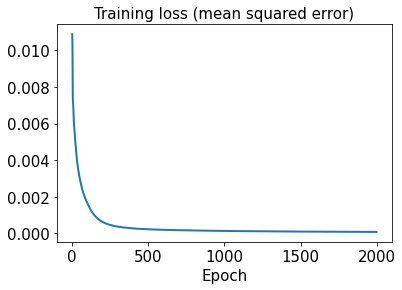

In [28]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

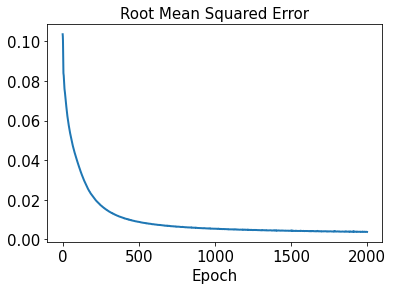

In [29]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [30]:
test_results = sd.evaluate(x_train)

19/19 [==============================] - 0s 1ms/step - loss: 7.0128e-05 - rmse: 0.0000e+00


In [31]:
decoded_train = sd.predict(x_train)

In [32]:
decoded_test = sd.predict(x_test)

In [33]:
error_train_abs = np.abs(decoded_train - y_train)

In [34]:
error_test_abs = np.abs(decoded_test - y_test)

In [35]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.001313342


In [36]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.013669802


In [37]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [38]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

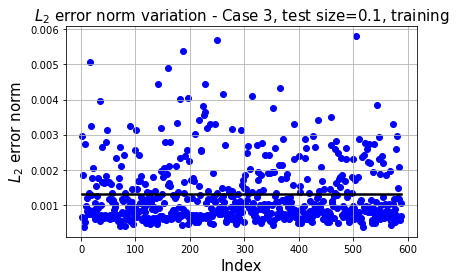

In [39]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

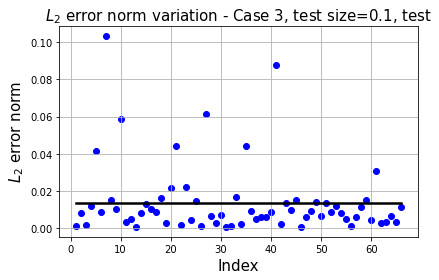

In [40]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

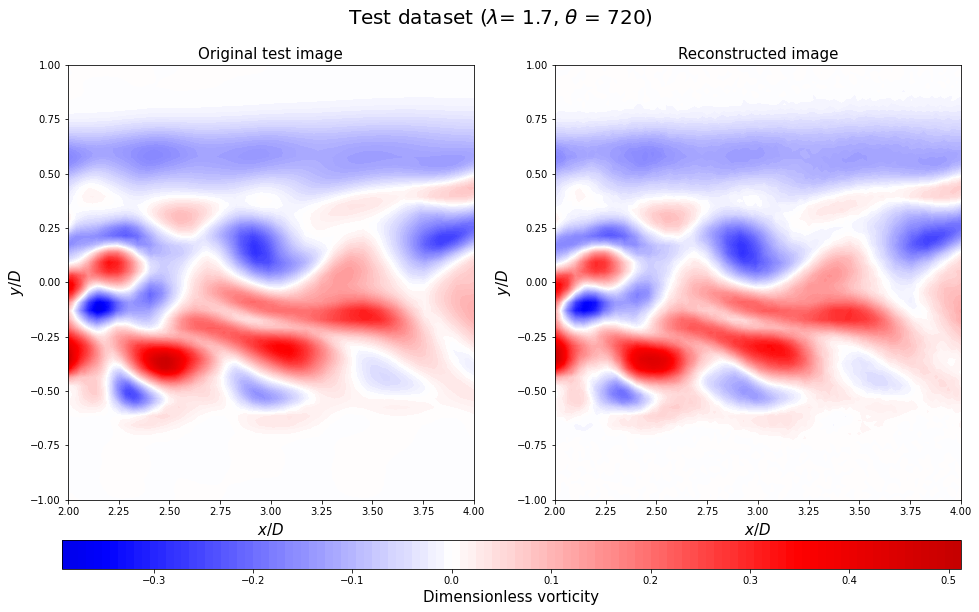

In [43]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

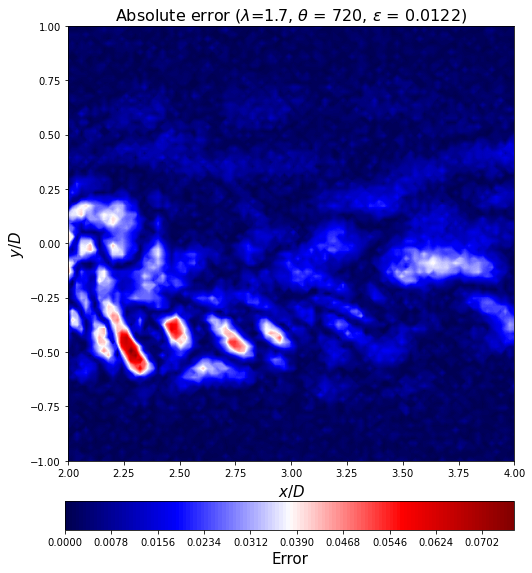

In [42]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()